In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [7]:
df=pd.read_csv("iris.csv")

In [8]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [10]:
df["Species"].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [11]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


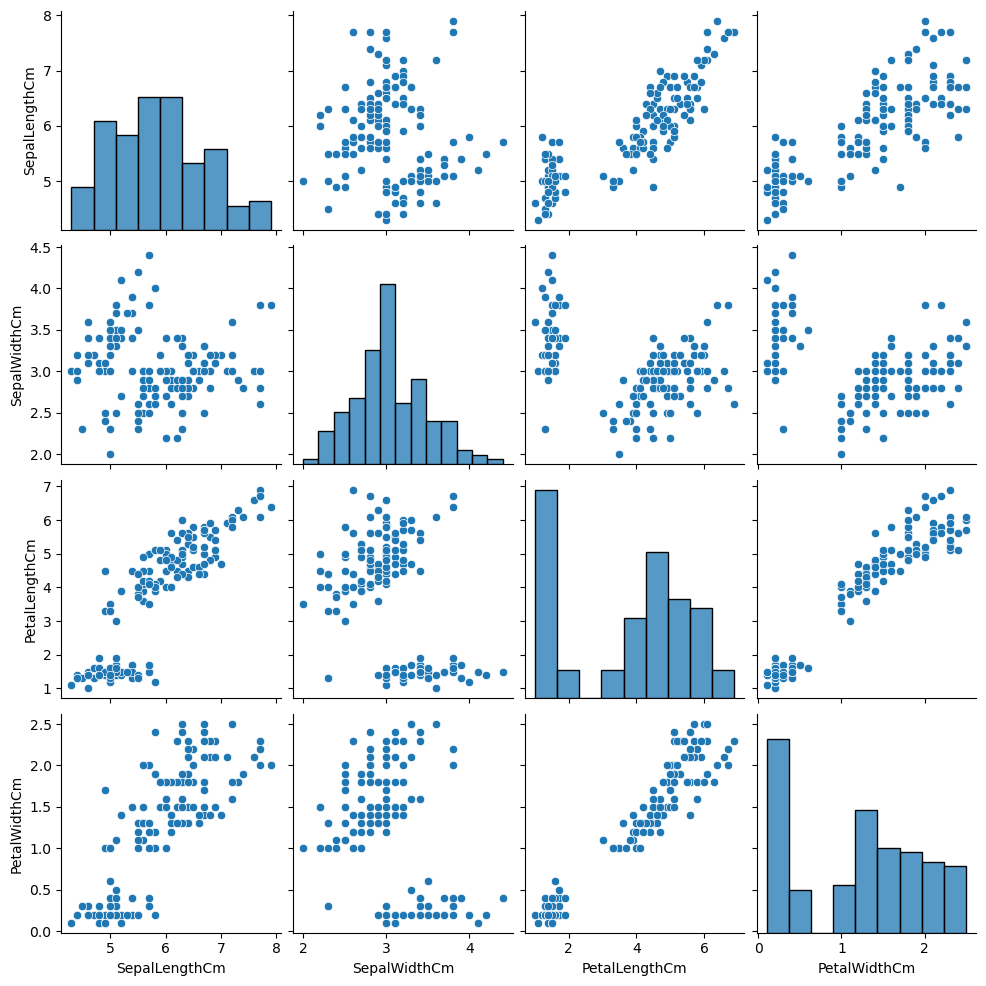

In [15]:
sns.pairplot(df.drop("Id",axis=1))
plt.show()

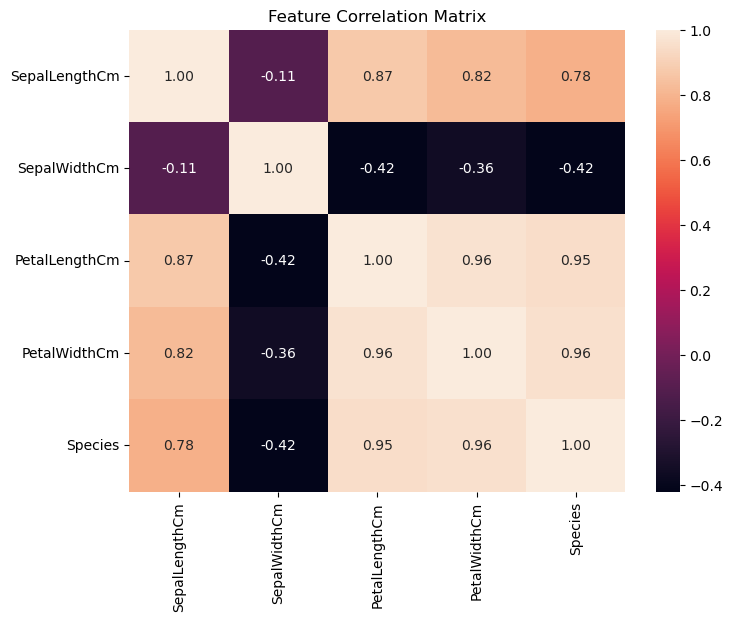

In [42]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, fmt=".2f")
plt.title('Feature Correlation Matrix')
plt.show()

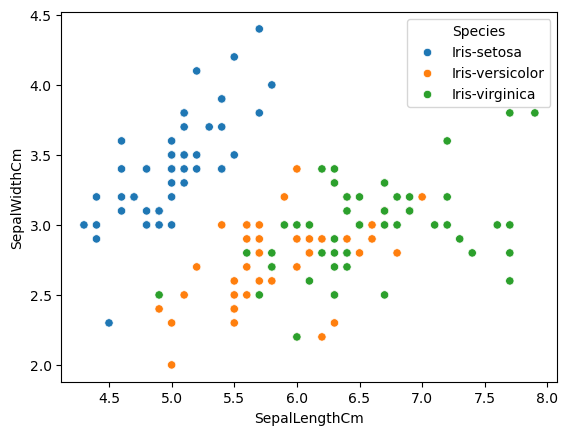

In [17]:
sns.scatterplot(x=df["SepalLengthCm"],y=df["SepalWidthCm"],hue=df["Species"])
plt.show()

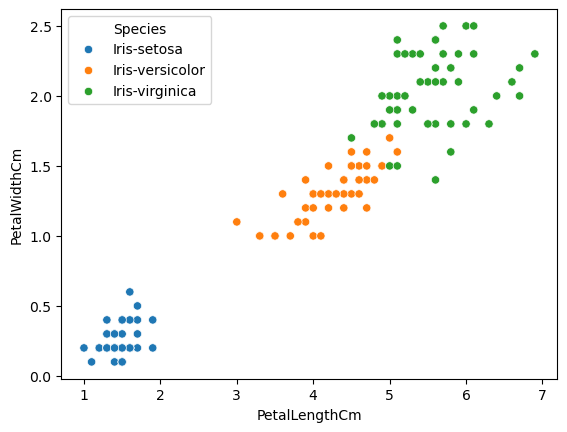

In [18]:
sns.scatterplot(x=df["PetalLengthCm"],y=df["PetalWidthCm"],hue=df["Species"])
plt.show()

In [19]:
df=df.drop("Id",axis=1)

In [21]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df["Species"]=encoder.fit_transform(df["Species"])

In [22]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [23]:
X = df.drop("Species", axis=1)
y = df["Species"]

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=15)

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [29]:
from sklearn.naive_bayes import GaussianNB

In [31]:
gnb = GaussianNB()

In [32]:
gnb.fit(X_train_scaled, y_train)
y_pred = gnb.predict(X_test_scaled)

In [34]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [39]:
print(list(encoder.classes_))

['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']


Accuracy Score: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



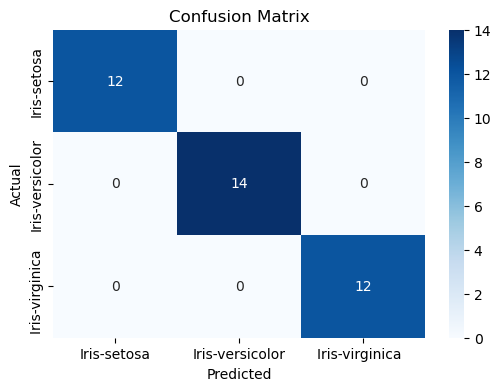

In [37]:
score = accuracy_score(y_test, y_pred)
print("Accuracy Score:", score)
print(classification_report(y_test, y_pred))

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=['Iris-setosa', 'Iris-versicolor','Iris-virginica  '],
            yticklabels=['Iris-setosa', 'Iris-versicolor','Iris-virginica  '])

plt.xlabel('Predicted')  
plt.ylabel('Actual')     
plt.title('Confusion Matrix')
plt.show()

In [44]:
from sklearn.linear_model import LogisticRegression
logistic_regression=LogisticRegression(max_iter=200)

In [45]:
param_grid = [
    {
        'penalty': ['l1', 'l2'],
        'C': [0.1, 1, 10, 100],
        'solver': ['liblinear'] # l1 ve l2'yi destekler
    }]

In [49]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=logistic_regression, 
                           param_grid=param_grid, 
                           cv=5, 
                           scoring='accuracy' 
                           )

In [50]:
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid=[{'C': [0.1, 1, 10, 100], 'penalty': ['l1', 'l2'],
                          'solver': ['liblinear']}],
             scoring='accuracy')

In [53]:
print("Best Parameters found by Grid Search:", grid_search.best_params_)
print("Best Cross-Validation Accuracy: {:.2f}".format(grid_search.best_score_))

Best Parameters found by Grid Search: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Best Cross-Validation Accuracy: 0.95


In [54]:
best_log_reg = grid_search.best_estimator_
y_pred_log_reg = best_log_reg.predict(X_test_scaled)

In [55]:
score_log_reg = accuracy_score(y_test, y_pred_log_reg)
print("\nLogistic Regression Test Accuracy Score:", score_log_reg)
print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log_reg))


Logistic Regression Test Accuracy Score: 0.7105263157894737

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.67      0.80        12
           1       0.56      1.00      0.72        14
           2       1.00      0.42      0.59        12

    accuracy                           0.71        38
   macro avg       0.85      0.69      0.70        38
weighted avg       0.84      0.71      0.70        38



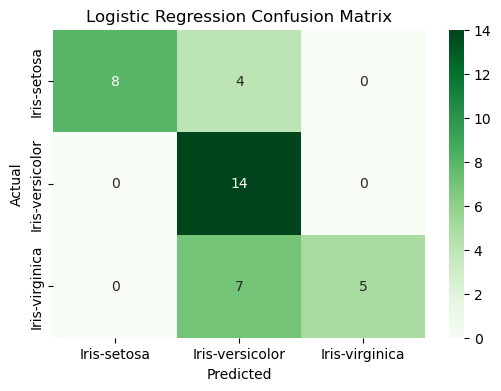

In [56]:
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_log_reg), annot=True, fmt='d', cmap='Greens',
            xticklabels=encoder.inverse_transform([0, 1, 2]),
            yticklabels=encoder.inverse_transform([0, 1, 2]))

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression Confusion Matrix')
plt.show()